In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot  as plt

In [2]:
con = [1093,1134,1293,1428,1477,1481,1557,1591,1316,1389]
cas = [1119,910,873,880,1282,1584,875,1009,1489,989]
all_file = [1119,910,873,880,1282,1584,875,1009,1489,989,1093,1134,1293,1428,1477,1481,1557,1591,1316,1389]
col = ['chr','start','ref','alt','ref_gene','func_refgene','avsnp147','clinvar_clinvar','intervar_intervar_and_evidence']
rename_col= ['CHR','POS','REF','ALT','Ref_Gene','Func_RefGene','avsnp147','Clinvar','Intervar']

### Loop For Case

In [3]:
case_merged = pd.DataFrame(columns=rename_col)
case_append = pd.DataFrame(columns=rename_col)

for file in cas:
    case = pd.read_excel('../intervar_res.xlsx',sheet_name=str(file)+"_case",usecols=col)
    case.columns = rename_col
    case.Clinvar = case.Clinvar.map(lambda x : x[9:])
    case.Intervar = case.Intervar.map(lambda x : x[10:])
    
    case_append = case_append.append(case)
    case_merged = case_merged.merge(case,how = 'outer', on = rename_col)
case_append.shape, case_merged.shape   

((241, 9), (178, 9))

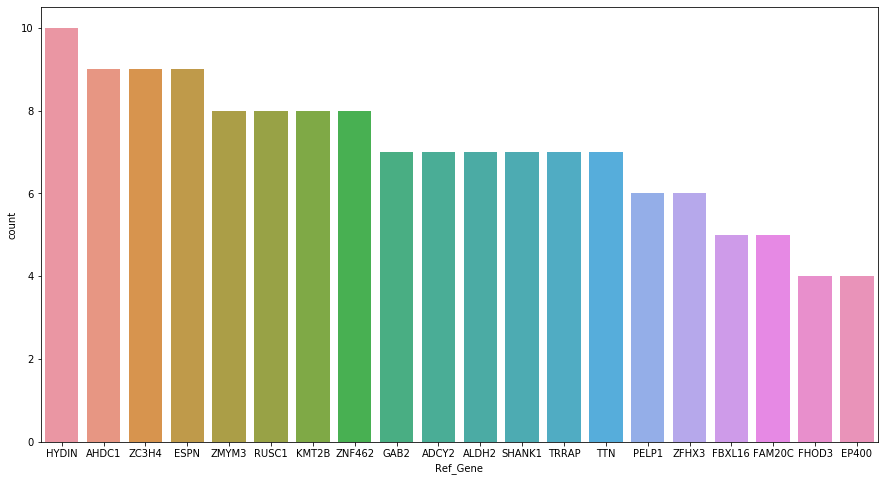

In [4]:
plt.figure(figsize=(15,8))
sns.countplot(case_append.Ref_Gene,
             order = case_append.Ref_Gene.value_counts().index[:20])

##### HYDIN
* https://www.genecards.org/cgi-bin/carddisp.pl?gene=HYDIN
* https://www.malacards.org/card/kartagener_syndrome
* https://www.malacards.org/card/primary_ciliary_dyskinesia This link show details about infertilaty

##### ESPN
* https://ghr.nlm.nih.gov/gene/ESPN#conditions `USHER SYNDROME-- TYPE 1M, Nonsyndromic hearing loss , profound hearing loss, and vestibular areflexia in some patients. [MIM:609006]`
##### AHDC1
* https://ghr.nlm.nih.gov/condition/xia-gibbs-syndrome ` global developmental delay, hypotonia, obstructive sleep apnea, intellectual disability and seizures. `
##### ZC3H4
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5587837/ 
##### ZNF462 
* https://www.genecards.org/cgi-bin/carddisp.pl?gene=ZNF462  `Developmental anomalies during embryogenesis, Rare eye diseases, Rare bone diseases `
##### KMT2B
* https://www.genecards.org/cgi-bin/carddisp.pl?gene=KMT2B `Plays a central role in beta-globin locus transcription regulation by being recruited by NFE2 (PubMed:17707229). Plays an important role in controlling bulk H3K4me during oocyte growth and preimplantation development (By similarity). Required during the transcriptionally active period of oocyte growth for the establishment and/or maintenance of bulk H3K4 trimethylation (H3K4me3), global transcriptional silencing that preceeds resumption of meiosis, oocyte survival and normal zygotic genome activation (By similarity). `
##### ZMYM3
* https://www.genecards.org/cgi-bin/carddisp.pl?gene=ZMYM3  `Diseases associated with ZMYM3 include Dystonia 3, Torsion, X-Linked and Myasthenic Syndrome, Congenital, 6, Presynaptic. An important paralog of this gene is ZMYM2.`  `From UniProt:A chromosomal aberration involving ZMYM3 may be a cause of X-linked mental retardation in Xq13.1. Translocation t(X;13)(q13.1;?).`

##### RUSC1
##### ALDH2
*https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4175174/ `Related to pregnency`
#### TRRAP
`DEVELOPMENTAL DELAY WITH OR WITHOUT DYSMORPHIC FACIES AND AUTISM`
#### TTN
* https://synapse.koreamed.org/Synapse/Data/PDFData/0044KJP/kjp-25-284.pdf
* https://ghr.nlm.nih.gov/gene/TTN 
* https://www.malacards.org/card/spinocerebellar_ataxia_autosomal_recessive_16
##### ADCY2
* 

## Loop for Control

In [5]:
control_merged = pd.DataFrame(columns=rename_col)
control_append = pd.DataFrame(columns=rename_col)

for file in con:
    control = pd.read_excel('../intervar_res.xlsx',sheet_name=str(file)+"_control",usecols=col)
    control.columns = rename_col
    control.Clinvar = control.Clinvar.map(lambda x : x[9:])
    control.Intervar = control.Intervar.map(lambda x : x[10:])
    control_append = control_append.append(control)
    control_merged = control_merged.merge(control,how = 'outer', on = rename_col)
control_append.shape, control_merged.shape   

((241, 9), (177, 9))

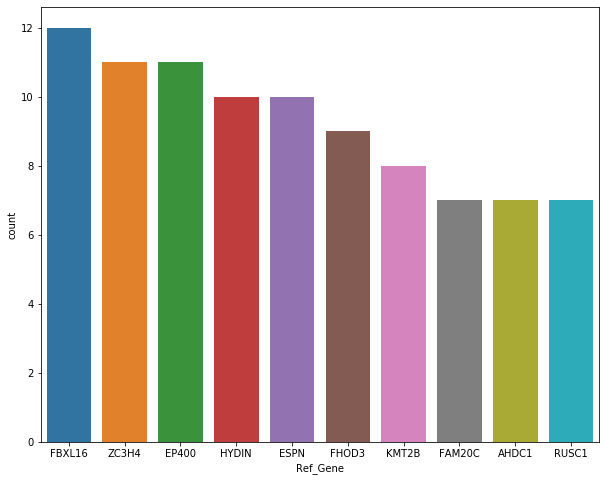

In [6]:
plt.figure(figsize=(10,8))
sns.countplot(control_append.Ref_Gene,
             order = control_append.Ref_Gene.value_counts().index[:10])

In [61]:
#case_append.Ref_Gene.value_counts().index[:20]
case_gene = case_append.Ref_Gene.value_counts()
#display(case_append.Ref_Gene.value_counts()[5:25])
#control_append.Ref_Gene.value_counts().index[:20]
#display(control_append.Ref_Gene.value_counts()[5:25])
control_gene = control_append.Ref_Gene.value_counts()
a=pd.DataFrame([case_gene,control_gene])

In [98]:
#We are Counting Repeating genes on Case and Control
case_gene

HYDIN        10
AHDC1         9
ZC3H4         9
ESPN          9
ZMYM3         8
             ..
XRCC1         1
ARHGEF10L     1
OPN1MW2       1
PEX1          1
ABCC6         1
Name: Ref_Gene, Length: 101, dtype: int64

In [99]:
control_gene

FBXL16    12
ZC3H4     11
EP400     11
HYDIN     10
ESPN      10
          ..
CDYL       1
GNAT2      1
COQ2       1
CLCN7      1
FGFR3      1
Name: Ref_Gene, Length: 100, dtype: int64

In [66]:
pd.set_option('display.max_columns', 1000)
#a = a.T.fillna(0)
#a.reset_index(level = 0,inplace=True)
a.columns = ["GENE","Case_Gene","Control_Gene"]
a.to_excel("../case_con_gene_table.xlsx",index = False)

a.head()

,GENE,Case_Gene,Control_Gene
0,HYDIN,10.0,10.0
1,AHDC1,9.0,7.0
2,ZC3H4,9.0,11.0
3,ESPN,9.0,10.0
4,ZMYM3,8.0,6.0


In [94]:
a.shape

(165, 3)

In [24]:
gene_gestational = ["WNT4", 'TGFBR3', 'BOLA3', 'EEFSEC' , 'ADCY5','SFTA2', 'BNC2','SEC61B','MPP7','AGTR2','RAP2C']
gene_preterm = ['EEFSEC','EBF1','TEKT3','TGFB1','AGTR2']

In [52]:
#a[a.columns[a.isnull().any()]].T
#a.columns.isin(gene_gestational)
#a.columns.isin(gene_preterm)


## We mainly Find 2 Gene Position ALDH2 and ZFHX3 in Case and not in control

In [10]:
our_pos = [139540103,108612304,75534704,75526563,75526563,75526780,75506172,75522394,220876353,90002548,75498490,75531681,\
           96753149,75498490,75531681,96753149,75499347,75517725,96738585,6960776,148550156,75533452,155292758,27878534]
#last 2 digits are sample data from each Case and Control

In [11]:
case_append[case_append.POS.isin(our_pos)]

,CHR,POS,REF,ALT,Ref_Gene,Func_RefGene,avsnp147,Clinvar,Intervar
0,1,155292758,-,C,RUSC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
0,1,27878534,-,GGCC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
1,1,27878534,-,CC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
1,1,27878534,-,GGGCC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
3,1,27878534,-,GGCC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
4,1,155292758,-,C,RUSC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
2,1,27878534,-,CC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
0,1,27878534,-,CC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."


In [12]:
control_append[control_append.POS.isin(our_pos)]

,CHR,POS,REF,ALT,Ref_Gene,Func_RefGene,avsnp147,Clinvar,Intervar
0,1,27878534,-,CC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
1,1,27878534,-,GCCC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
2,1,27878534,-,GCCC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
1,1,27878534,-,GGCC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
2,1,27878534,-,CC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
1,1,27878534,-,CC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."
0,1,27878534,-,GC,AHDC1,exonic,.,UNK,"Likely pathogenic PVS1=1 PS=[0, 0, 0, 0, 0] P..."


In [13]:
case_append.shape,control_append.shape

((241, 9), (241, 9))

In [14]:
#case_merged.head()

## Plotting All in a Graph

In [100]:
case_merged = pd.DataFrame(columns=rename_col)
case_append = pd.DataFrame(columns=rename_col)

for file in cas:
    case = pd.read_excel('../intervar_res.xlsx',sheet_name=str(file)+"_case",usecols=col)
    case.columns = rename_col
    case.Clinvar = case.Clinvar.map(lambda x : x[9:])
    case.Intervar = case.Intervar.map(lambda x : x[10:])
    
    case_append = case_append.append(case)
    case_merged = case_merged.merge(case,how = 'outer', on = rename_col)
case_append.shape, case_merged.shape   

((241, 9), (178, 9))

### Only Pathegonic from Case & Control

In [79]:
#case_append.Intervar = case_append.Intervar.apply(lambda x : x.split()[0]))
#case_append.Intervar  = case_append.Intervar.apply(lambda x : x[0])

control_append.Intervar = control_append.Intervar.apply(lambda x: x.split()[0] )

In [81]:
case_path = case_append[case_append.Intervar=="Pathogenic"]
control_path = control_append[control_append.Intervar=="Pathogenic"]

### Pathogenic is in Case and not in Control
!!! Not Found according to this data

In [83]:
 case_path[~(case_path.Intervar.isin(control_path.Intervar))]

,CHR,POS,REF,ALT,Ref_Gene,Func_RefGene,avsnp147,Clinvar,Intervar


In [92]:
case_path.Ref_Gene.nunique() , control_path.Ref_Gene.nunique()

(29, 25)

In [93]:
case_path.shape, control_path.shape

((32, 9), (27, 9))